In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from scipy.signal import savgol_filter
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

plt.style.use('ggplot')

In [2]:
array = [[291.4,3823.2],[605.8,3100.3],[605.8 ,1751.6],[2802.2,3100.3]]
array = pd.DataFrame(array)
d,l = array.shape

In [3]:
x1 = 291.4
x2 = 3823.2

X1 = pd.read_csv('ethanol_cell_8x8.csv')
X2 = pd.read_csv('formalin_cell_8x8.csv')
X3 = pd.read_csv('methanol_cell_8x8.csv')
X4 = pd.read_csv('pure_cell_8x8.csv')

X1 = X1.loc[:,str(x1):str(x2)]
X2 = X2.loc[:,str(x1):str(x2)]
X3 = X3.loc[:,str(x1):str(x2)]
X4 = X4.loc[:,str(x1):str(x2)]


In [4]:
X = X1.append(X3)
X = X.append(X4)
X = X.append(X2)

Перевірка осі Х

In [5]:
Y = pd.read_csv('ethanol_cell_8x8.csv', header=None)
Y.columns  = list(Y.iloc[0, :])
y1 = Y.loc[0,x1:x2]

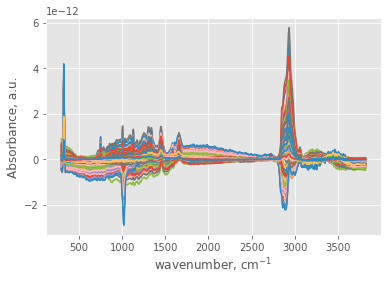

In [6]:
for i in range(len(X)):
    plt.plot(y1, X.iloc[i,:])
plt.xlabel('wavenumber, cm$^{-1}$')
plt.ylabel('Absorbance, a.u.')

name_s = "all spectrum in range {0} {1}.png"
plt.savefig(name_s.format(x1, x2))

plt.show()

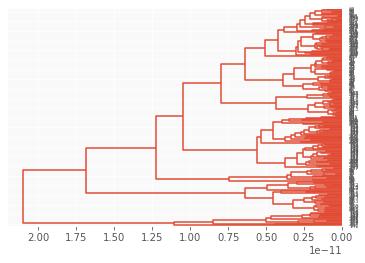

In [7]:
#X = (X - X.mean(axis=0))/X.std(axis=0)
Z = linkage(X, method='average', metric='euclidean')
dend = dendrogram(Z, orientation='left', color_threshold=0.0)
label = fcluster(Z, 0.9*pow(10, -11), criterion='distance')

In [8]:
n_clusters = np.unique(label).shape[0]
X['labels'] = label
labels_mean = X.groupby(['labels']).mean()

In [9]:
np.unique(label)

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [10]:
labels1 = label[0:64]
labels2 = label[192:240]
labels3 = label[64:128]
labels4 = label[128:192]
labels_arr = {'ethanol':labels1, 'formalin':labels2, 'methanol':labels3, 'pure':labels4}
y1.index = y1

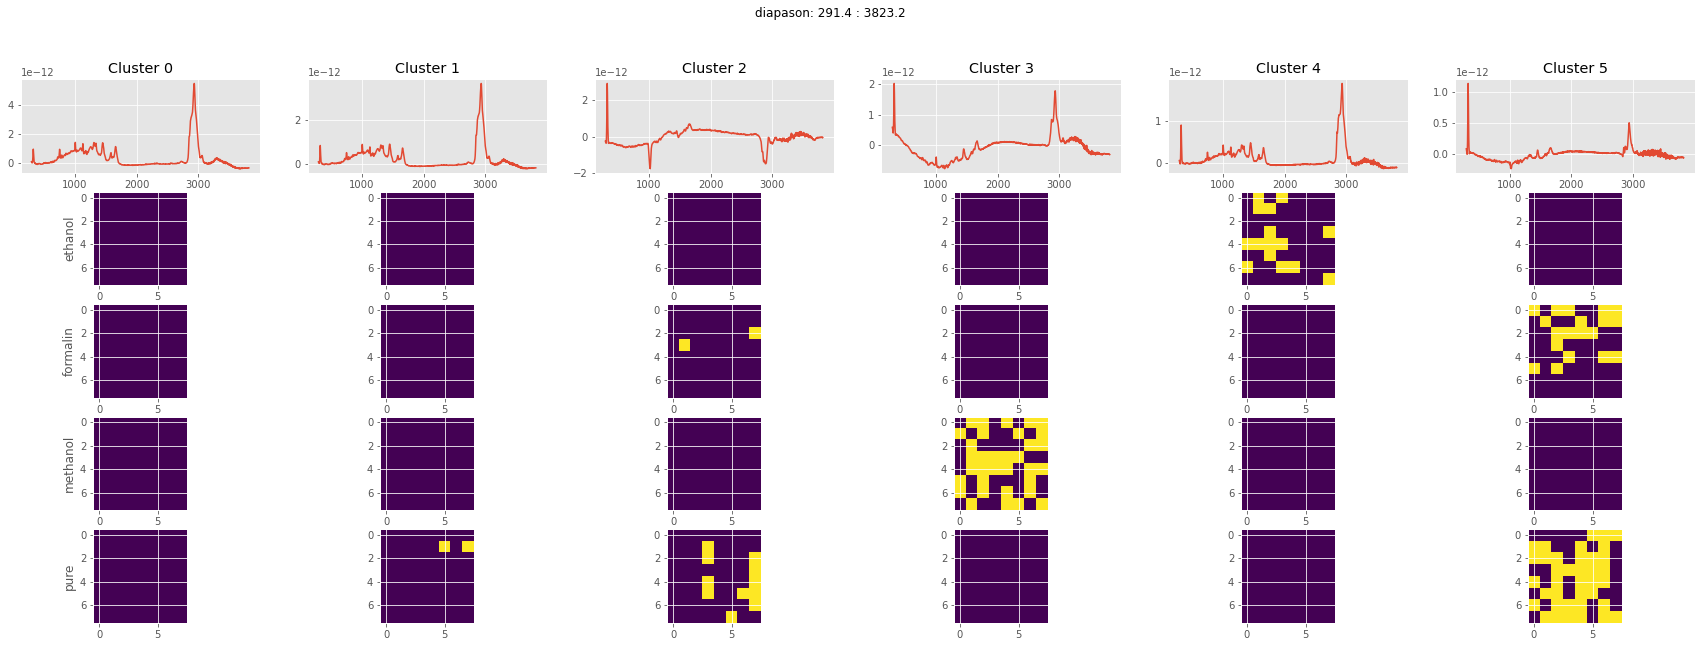

In [11]:
def dich(n, hight, width, material_n, labels_arr):
    
    fig, axes = plt.subplots(nrows=material_n+1, ncols=n_clusters, figsize=(30,10))
    plt.suptitle("diapason: " + str(x1) + " : " + str(x2))
        
    for i in range(n_clusters):
        axes[0,i].set(title = "Cluster " + str(i))
        axes[0,i].plot(y1, labels_mean.iloc[i])
        
    k=1
    for key in labels_arr:
            
        for i in range(n_clusters):
            cl = np.zeros(n)
                
            for j in range(len(labels_arr[key])):
                if i == labels_arr[key][j]:
                    cl[j] = 1
                R = np.reshape(cl, (hight, width))
                axes[k,i].imshow(R)
            axes[k,0].set_ylabel(key)
        k+=1
            
    plt.show()
    name = "Clasters in range {0} {1}.png"
    fig.savefig(name.format(x1, x2))
dich(64, 8, 8, 4, labels_arr)